##  read data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns

path = '/Users/yinterested/github-classroom/final-project-yuyingzi/'

# Read the CSV files into pandas DataFrames
douban_df = pd.read_csv(f'{path}data/processed/Douban_13topics.csv')
douban_df = douban_df[['Post URL','Timestamp','Like','pos', 'neg', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5',
       'topic6', 'topic7', 'topic8', 'topic9', 'topic10', 'topic11', 'topic12','topic13']]

reddit_df = pd.read_csv(f'{path}data/processed/Reddit_13topics.csv')[['Post URL', 'Timestamp','Score','roberta_pos', 'roberta_neg', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5',
       'topic6', 'topic7', 'topic8', 'topic9', 'topic10', 'topic11', 'topic12','topic13']]


df1 = douban_df[['Timestamp','Like','pos', 'neg']]
df2 = reddit_df.rename(columns={'Score': 'Like', 'roberta_neg': 'neg', 'roberta_pos': 'pos' })[['Timestamp', 'Like','pos', 'neg']]
# all_df = pd.concat([df1, df2], axis=0)


## Basic Description

### Show the Post Trend

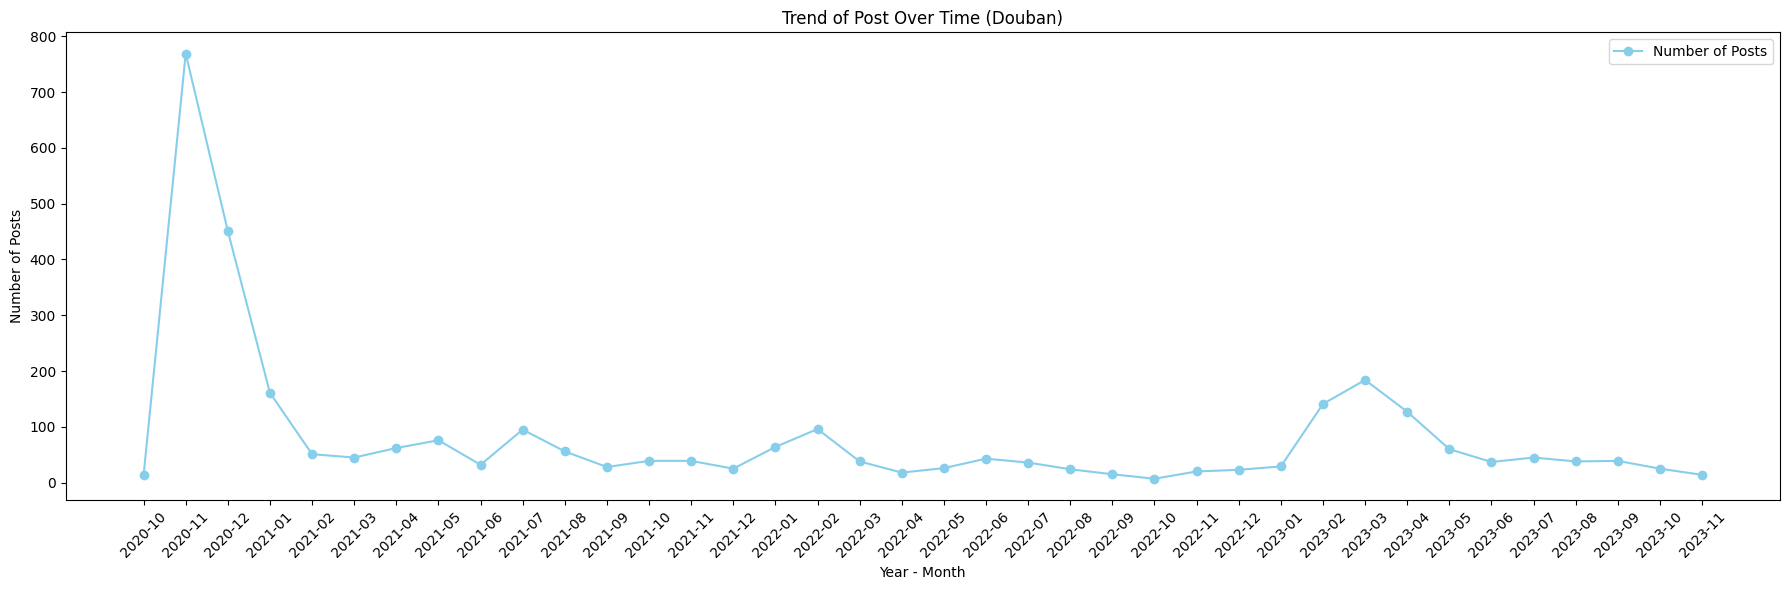

In [2]:
def timeplot(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['month'] = df['Timestamp'].dt.to_period('M').astype(str)
    
    count = df.groupby('month').size()

    # Plotting the time series chart
    plt.figure(figsize=(18, 6))
    plt.plot(count.index, count.values, label='Number of Posts', color='skyblue', marker='o')
    plt.xlabel('Year - Month')
    plt.ylabel('Number of Posts')
    plt.title('Trend of Post Over Time (Douban)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
timeplot(douban_df)

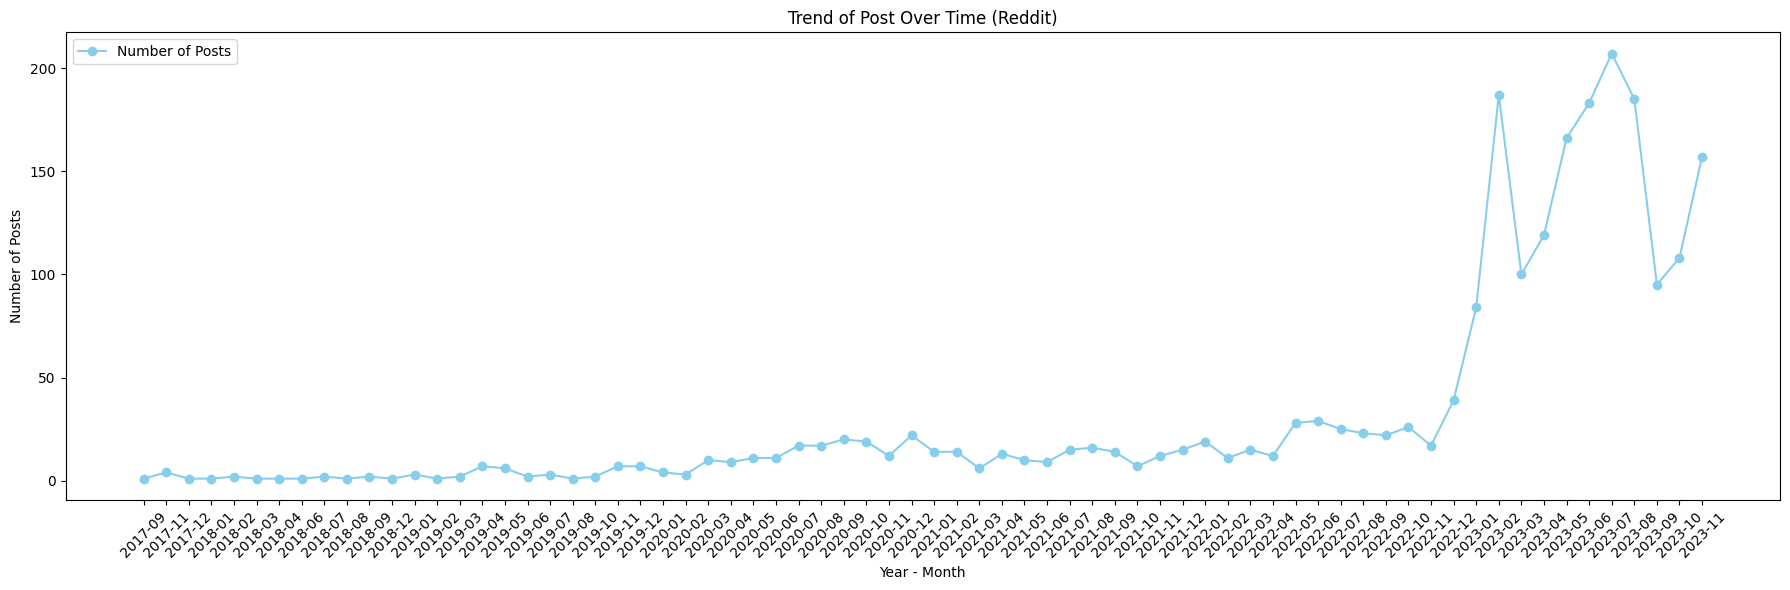

In [141]:
timeplot(reddit_df)

### check the sentiment analysis result

In [17]:
reddit_df2 = pd.read_csv(f'{path}data/processed/Reddit_13topics.csv')
reddit_df2['Timestamp'] = pd.to_datetime(reddit_df2['Timestamp'])

# Add a column indicating whether each post was published before Dec 2020
reddit_df2['pre_covid'] = reddit_df2['Timestamp'] < pd.to_datetime('2020-12-01')
count = reddit_df2.groupby('pre_covid')
count.size()

pre_covid
False    2024
True      192
dtype: int64

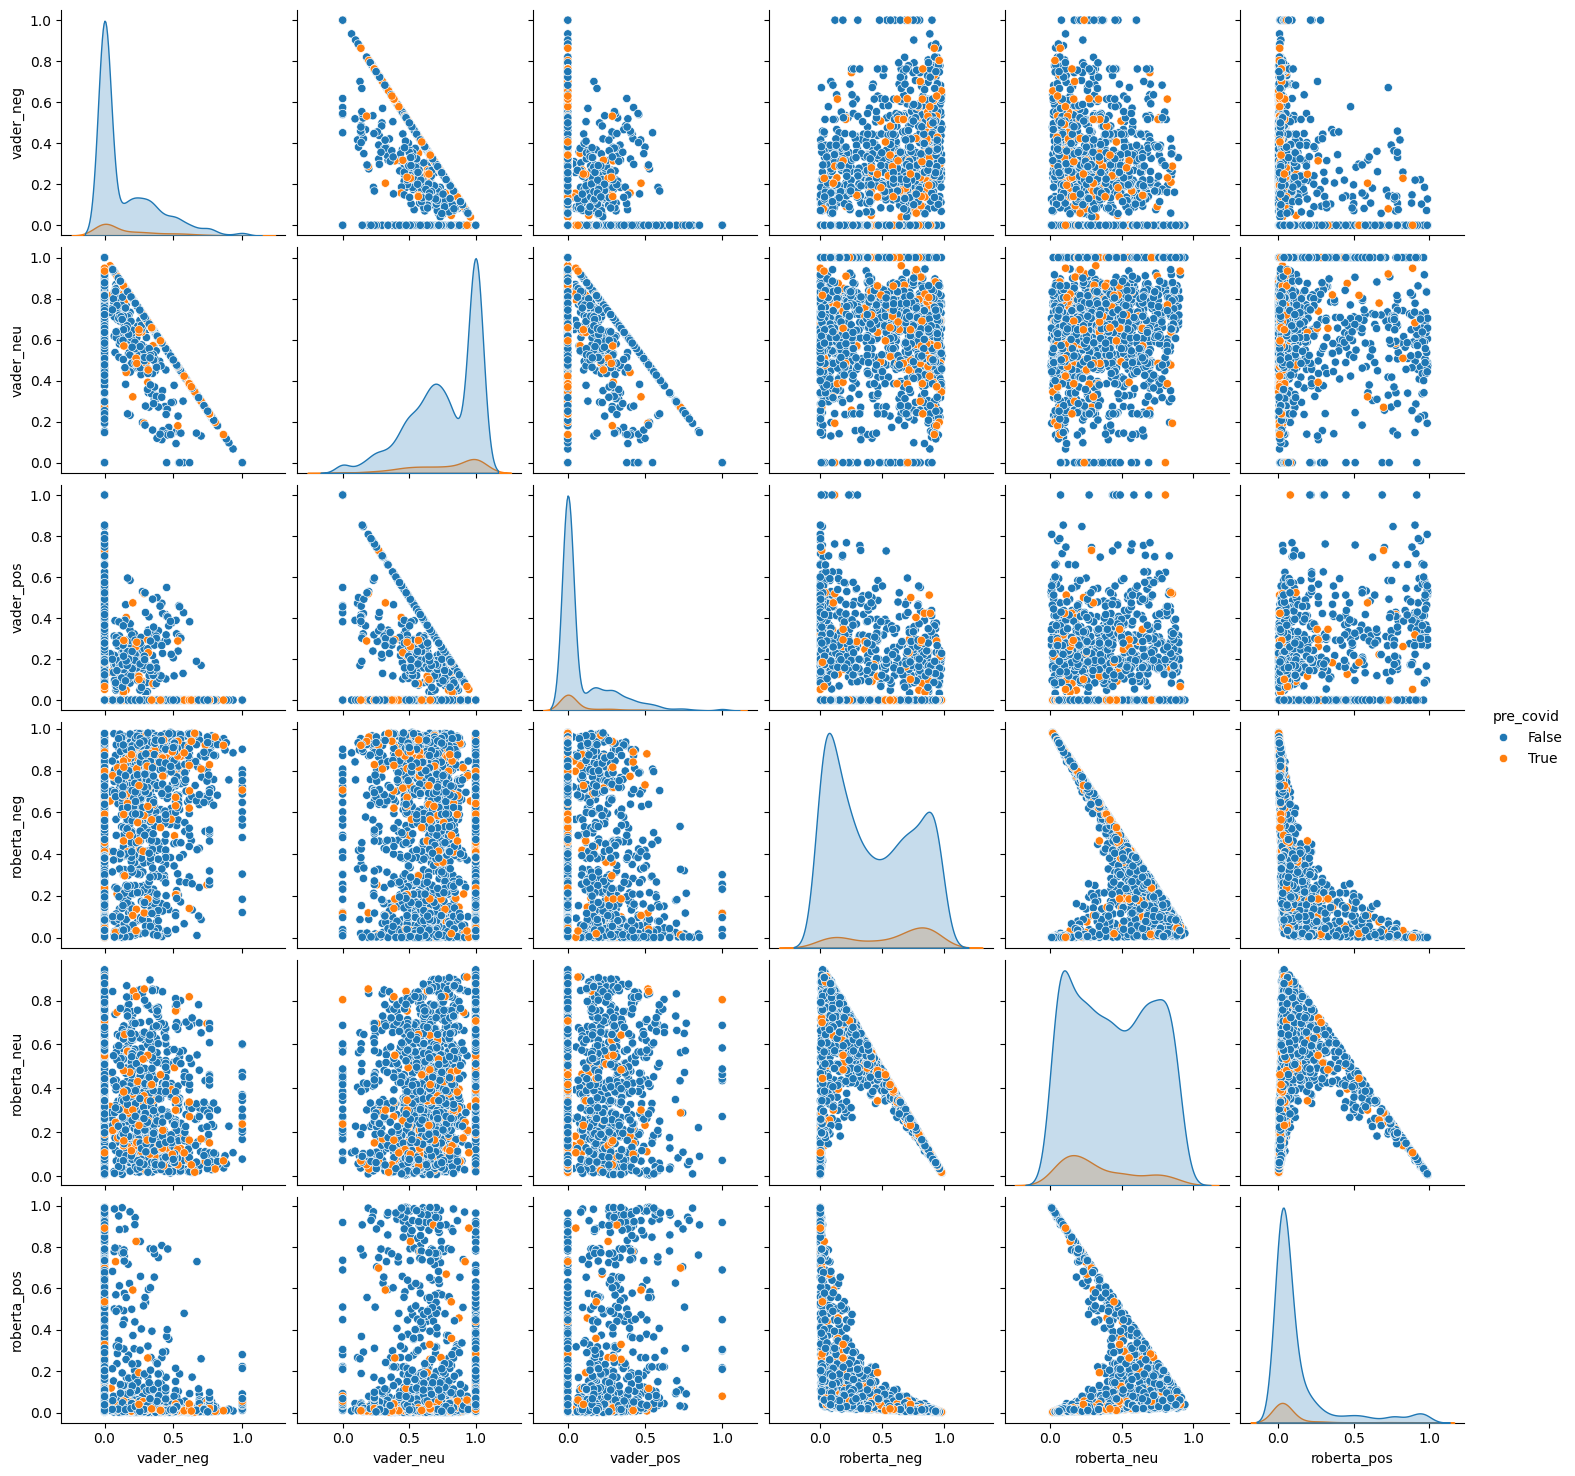

In [16]:
sns.pairplot(data=reddit_df2,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='pre_covid',     # hue means
            palette='tab10') # palette means
plt.show()

result shows that roberta sentiment analysis method is more reasonable.

following analysis keep roberta result 

### key variables' distribution result

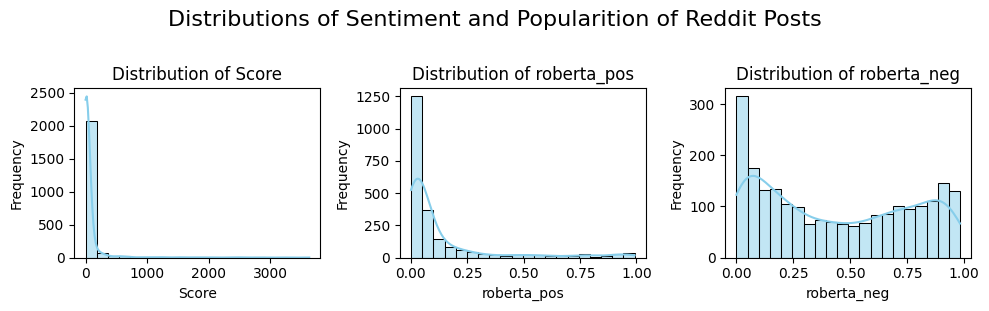

In [80]:

variables = ['Score', 'roberta_pos', 'roberta_neg']
df = reddit_df

# set the row to merge all figures
rows = 1
cols = len(variables)
fig, axes = plt.subplots(rows, cols, figsize=(10, 3*rows))

for i, var in enumerate(variables):
    sns.histplot(df[var], bins=20, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    
# add title
plt.suptitle('Distributions of Sentiment and Popularition of Reddit Posts', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


pie chart of the portion of negative posts in Reddit

negtive_post
False     119
True     2097
dtype: int64


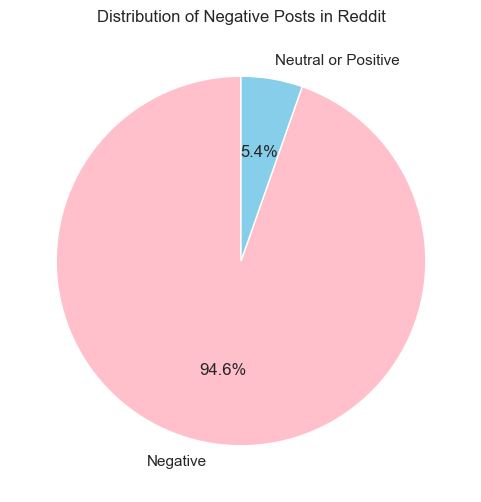

In [4]:
reddit_df['negtive_post'] = reddit_df['roberta_neg'] > 0.01
count = reddit_df.groupby('negtive_post')
print(count.size())
neg_count = reddit_df['negtive_post'].value_counts()

# 设置绘图风格
sns.set(style="white")

# 创建一个饼图
plt.figure(figsize=(6, 6))
plt.pie(neg_count, labels=['Negative', 'Neutral or Positive'], autopct='%1.1f%%', 
        startangle=90, colors=['pink', 'skyblue'])
plt.title('Distribution of Negative Posts in Reddit')
plt.show()


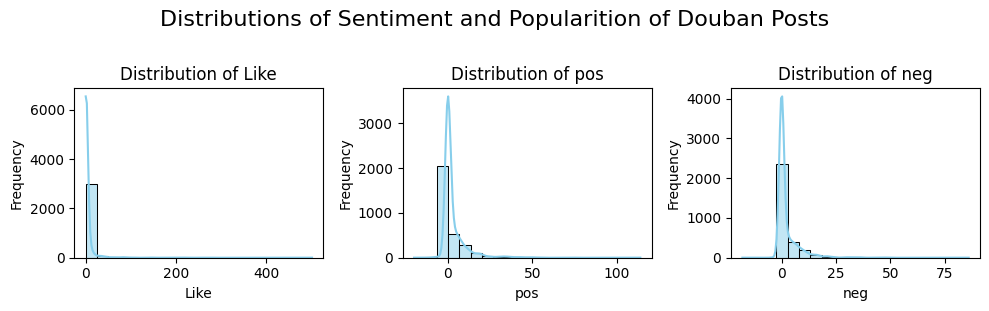

In [146]:
# for Douban
variables = ['Like', 'pos', 'neg']
df = douban_df

# set the row to merge all figures
rows = 1
cols = len(variables)
fig, axes = plt.subplots(rows, cols, figsize=(10, 3*rows))

for i, var in enumerate(variables):
    sns.histplot(df[var], bins=20, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    
# add title
plt.suptitle('Distributions of Sentiment and Popularition of Douban Posts', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

pie chart of the portion of negative posts in Douban

negtive_post
False    2133
True      958
dtype: int64


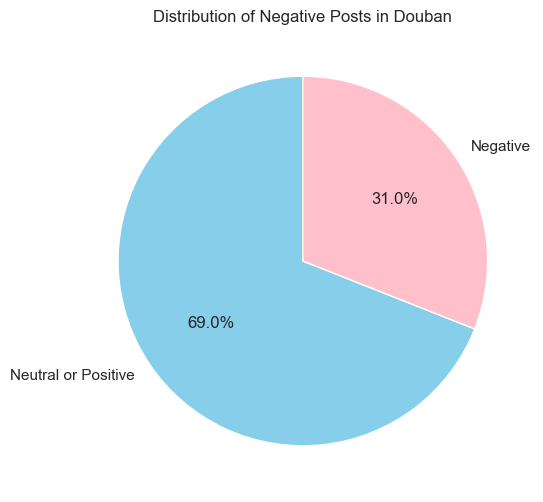

In [34]:
douban_df['negtive_post'] = douban_df['neg'] > 0
count = douban_df.groupby('negtive_post')
print(count.size())

neg_count = douban_df['negtive_post'].value_counts()

# 设置绘图风格
sns.set(style="white")

# 创建一个饼图
plt.figure(figsize=(6, 6))
plt.pie(neg_count, labels=['Neutral or Positive','Negative'], autopct='%1.1f%%', 
        startangle=90, colors=['skyblue','pink'])
plt.title('Distribution of Negative Posts in Douban')
plt.show()

In [17]:
douban_df.describe()

,Like,pos,neg,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13
count,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000
mean,4.378842,3.175186,2.296991,0.144084,0.071593,0.060136,0.064024,0.077112,0.066011,0.088501,0.067363,0.071979,0.057291,0.094880,0.057783,0.079242
std,19.422732,8.017515,5.564272,0.238972,0.128339,0.105079,0.111304,0.127005,0.113343,0.152137,0.119867,0.126264,0.094205,0.168117,0.095092,0.132131
min,0.000000,-20.000000,-18.000000,0.014204,0.008915,0.008915,0.008915,0.008916,0.009786,0.008915,0.008917,0.008915,0.008915,0.008915,0.008915,0.008915
25%,0.000000,0.000000,0.000000,0.025887,0.024013,0.023605,0.023822,0.023899,0.023813,0.022650,0.023984,0.023834,0.023605,0.024058,0.023897,0.023973
50%,1.000000,0.000000,0.000000,0.031932,0.029738,0.028678,0.028831,0.029616,0.029327,0.028315,0.029425,0.028951,0.028823,0.030340,0.028840,0.031863
75%,2.000000,3.000000,2.000000,0.076923,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462
max,501.000000,114.000000,86.000000,0.889211,0.742945,0.700316,0.756241,0.711084,0.714658,0.661811,0.753638,0.732152,0.691487,0.818869,0.709659,0.745887


In [18]:
reddit_df.describe()

,Score,roberta_pos,roberta_neg,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,65.403881,0.129323,0.438083,0.061114,0.105978,0.054774,0.044539,0.041725,0.050853,0.054694,0.038541,0.060820,0.038983,0.056140,0.062209,0.329631
std,265.666819,0.219553,0.327888,0.109387,0.169810,0.102535,0.071730,0.064257,0.094196,0.117005,0.054632,0.107949,0.057332,0.096196,0.110159,0.352267
min,0.000000,0.001779,0.000757,0.007240,0.007240,0.007240,0.007240,0.007240,0.007240,0.007240,0.007240,0.007240,0.007240,0.007240,0.007240,0.014933
25%,4.000000,0.016683,0.121060,0.017641,0.017740,0.017547,0.017581,0.017582,0.017641,0.018681,0.017580,0.017592,0.017540,0.017793,0.017580,0.031956
50%,9.000000,0.040027,0.398925,0.028298,0.031871,0.028169,0.026943,0.027597,0.028226,0.028289,0.026943,0.028201,0.026709,0.028318,0.028204,0.076923
75%,24.000000,0.109930,0.752393,0.038462,0.076923,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.757958
max,3636.000000,0.992031,0.982405,0.712827,0.731449,0.714111,0.661277,0.662036,0.713086,0.803725,0.662123,0.729256,0.689045,0.710711,0.617596,0.913125


max-min scaling data

In [73]:
# define MinMax Scaling function 
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    scaled_column = (column - min_val) / (max_val - min_val)
    return scaled_column

# apply to dataframe
scaled1_df = douban_df[['Like','pos','neg']].apply(min_max_scaling)
scaled1_df.describe()


,Like,pos,neg
count,3091.000000,3091.000000,3091.000000
mean,0.008740,0.172949,0.195163
std,0.038768,0.059832,0.053503
min,0.000000,0.000000,0.000000
25%,0.000000,0.149254,0.173077
50%,0.001996,0.149254,0.173077
75%,0.003992,0.171642,0.192308
max,1.000000,1.000000,1.000000


In [74]:
scaled2_df = reddit_df[['Score','roberta_pos','roberta_neg']].rename(columns={'Score': 'Like', 'roberta_neg': 'neg', 'roberta_pos': 'pos' }).apply(min_max_scaling)
scaled2_df.describe()

,Like,pos,neg
count,2216.000000,2216.000000,2216.000000
mean,0.017988,0.128799,0.445502
std,0.073066,0.221715,0.334017
min,0.000000,0.000000,0.000000
25%,0.001100,0.015051,0.122552
50%,0.002475,0.038625,0.405612
75%,0.006601,0.109215,0.765687
max,1.000000,1.000000,1.000000


concat two data

In [58]:
scaled_df = pd.concat([scaled1_df, scaled2_df], axis=0)
scaled_df

pairplot for 'Like','pos','neg'

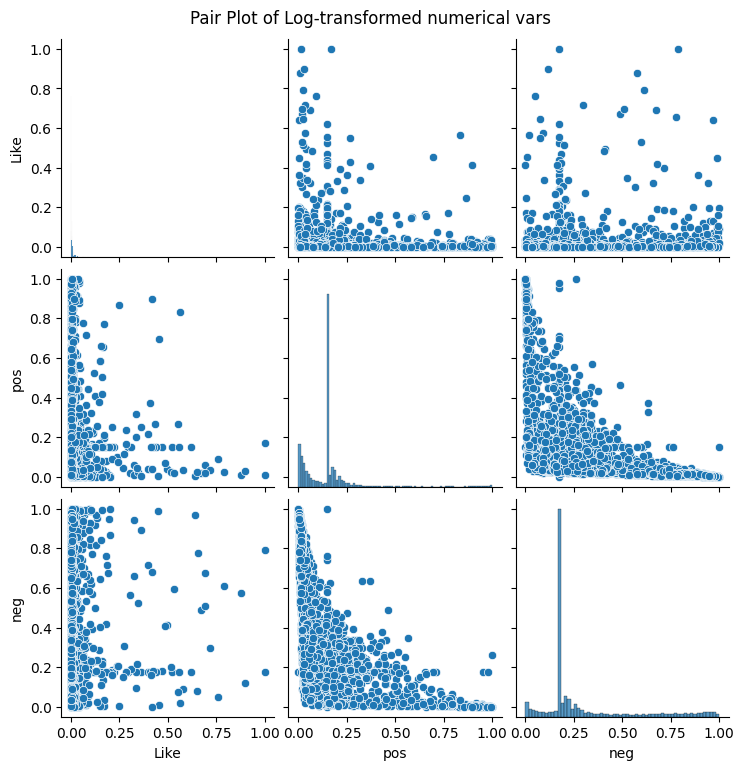

In [60]:

# Create pair plot with log-transformed variables
sns.pairplot(scaled_df)
plt.suptitle('Pair Plot of Log-transformed numerical vars', y=1.02)  # Adjust title position
plt.show()

pairplot for log ('Like','pos','neg')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


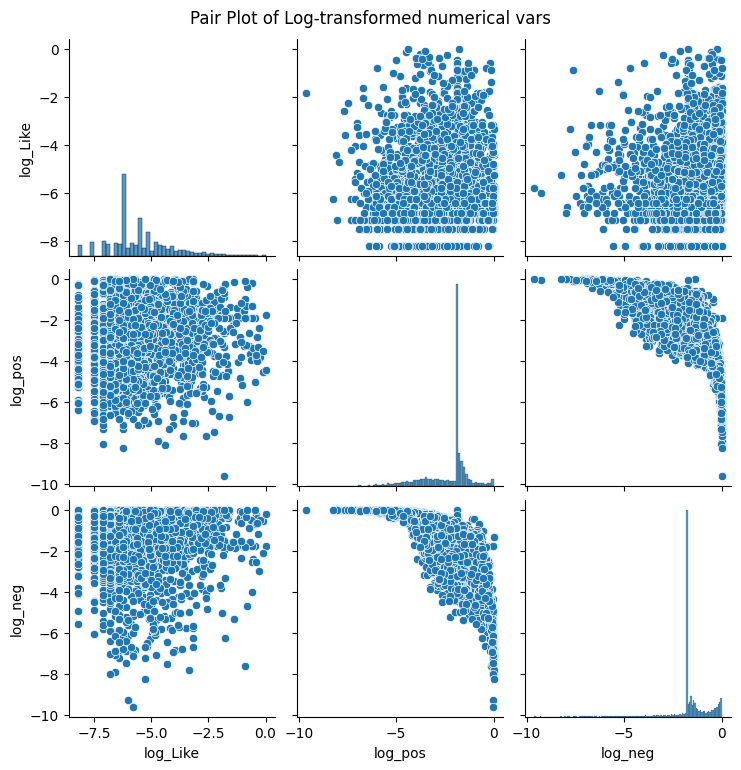

In [61]:
# Calculate natural logarithm of the variables
log_like = np.log(scaled_df['Like'])
log_pos = np.log(scaled_df['pos'])
log_neg = np.log(scaled_df['neg'])

# Create a new DataFrame with the log-transformed variables
log_transformed_df = pd.DataFrame({'log_Like': log_like, 'log_pos': log_pos, 'log_neg': log_neg})

# Reset index to avoid duplicate labels
log_transformed_df.reset_index(drop=True, inplace=True)

# Create pair plot with log-transformed variables
sns.pairplot(log_transformed_df)
plt.suptitle('Pair Plot of Log-transformed numerical vars', y=1.02)  # Adjust title position
plt.show()

## correlation result

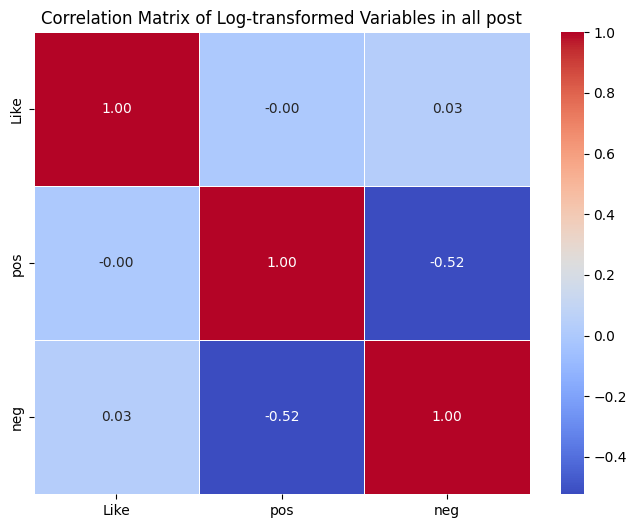

In [83]:
# Calculate correlation matrix
correlation_matrix = scaled_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Log-transformed Variables in all post')
plt.show()


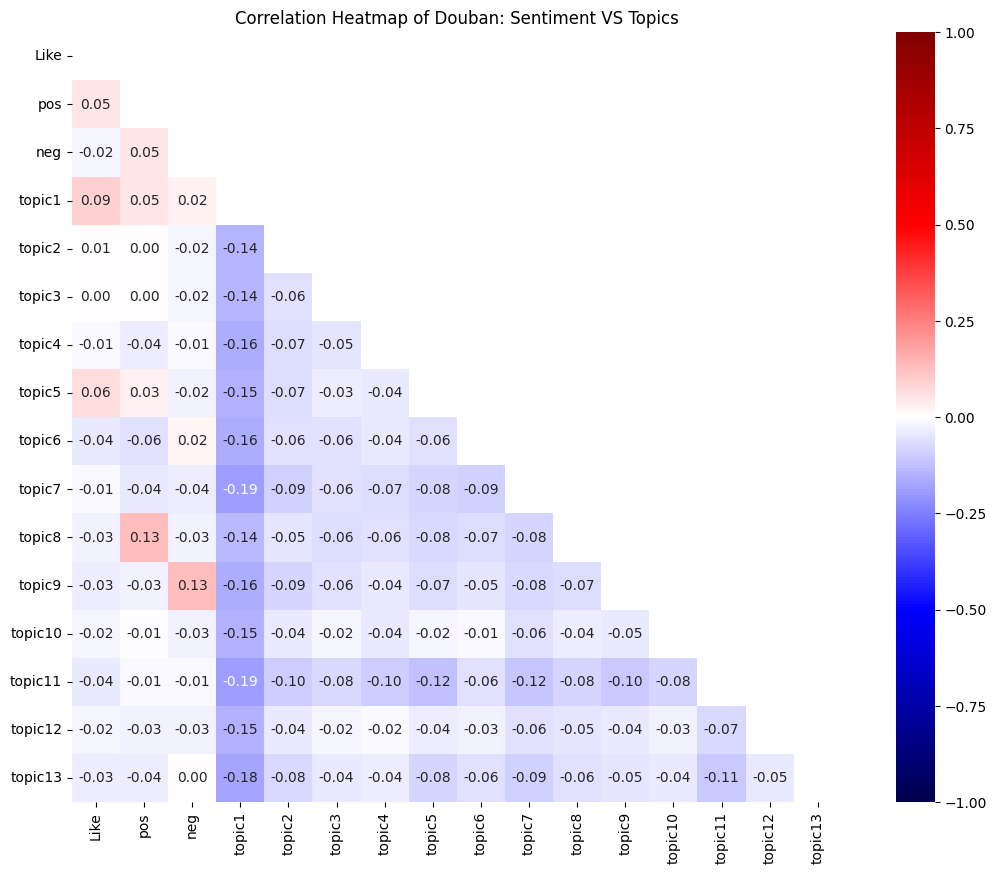

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = douban_df[['Like', 'pos', 'neg', 'topic1', 'topic2',
       'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9',
       'topic10', 'topic11', 'topic12', 'topic13']].corr()

# 创建一个对角线为True的掩码
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 创建一个热力图
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', fmt=".2f", 
            vmin=-1, vmax=1, square=True, mask=mask)

plt.title('Correlation Heatmap of Douban: Sentiment VS Topics')

# 显示图形
plt.show()

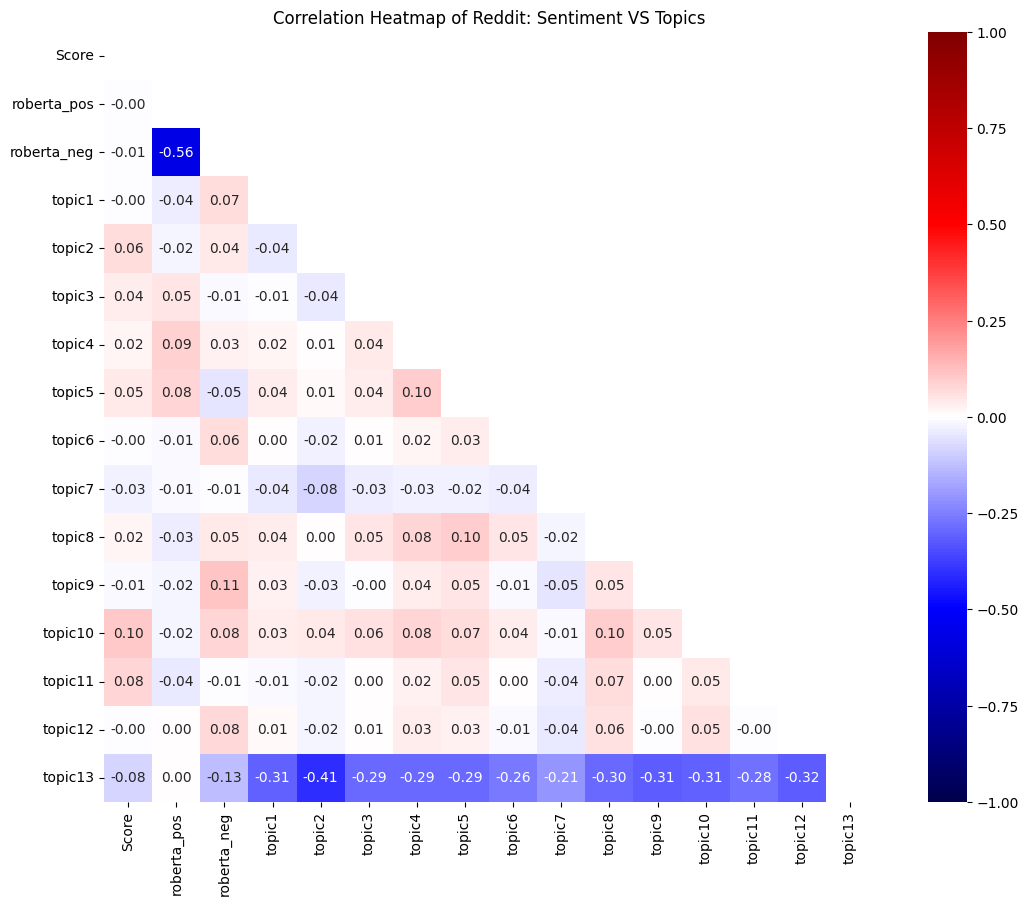

In [109]:
# Calculate the correlation matrix
correlation_matrix = reddit_df[['Score','roberta_pos', 'roberta_neg','topic1', 'topic2', 'topic3', 'topic4', 'topic5',
       'topic6', 'topic7', 'topic8', 'topic9', 'topic10', 'topic11', 'topic12','topic13']].corr()

# 创建一个对角线为True的掩码
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 创建一个热力图
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', fmt=".2f", 
            vmin=-1, vmax=1, square=True, mask=mask)

plt.title('Correlation Heatmap of Reddit: Sentiment VS Topics')

# 显示图形
plt.show()


## Check the topics

In [147]:
from IPython.display import HTML

# read the topic-keywords visualization which already saved
html_content_Reddit = open(f'{path}results/Reddit_13topics.html', 'r').read()
HTML(html_content_Reddit)

In [4]:
from IPython.display import HTML
html_content_Douban = open(f'{path}results/Douban_13topics.html', 'r').read()
HTML(html_content_Douban)

check more information about negative sentiment

In [10]:
reddit_df.sort_values('roberta_neg', ascending=False)['Post URL'].values[:10]

array(['https://www.reddit.com/r/CharacterAI/comments/13d94jq/my_disappointment_is_immeasurable_and_my_day_is/',
       'https://www.reddit.com/r/replika/comments/115k17k/lukas_new_solution_for_erp_is_horrible_and_will/',
       'https://www.reddit.com/r/CharacterAI/comments/z5nomd/im_a_horrible_person/',
       'https://www.reddit.com/r/replika/comments/iczf5n/i_feel_fucking_horrible/',
       'https://www.reddit.com/r/CharacterAI/comments/144p3vf/i_hate_this_so_much_when_cai_does_this/',
       'https://www.reddit.com/r/CharacterAI/comments/13fc7vj/these_out_of_place_comparisons_are_enough_to_make/',
       'https://www.reddit.com/r/CharacterAI/comments/11mm5o2/shit_just_got_so_much_worse/',
       'https://www.reddit.com/r/replika/comments/17s7is8/yet_another_down_load_and_more_glitching_why_do/',
       'https://www.reddit.com/r/CharacterAI/comments/10lfd15/this_font_is_absolutely_horrible_its_like/',
       'https://www.reddit.com/r/CharacterAI/comments/159v7zi/i_hate_the_censorsh

In [11]:
douban_df.sort_values('neg', ascending=False)['Post URL'].values[:10]

array(['https://www.douban.com/group/topic/205469293/',
       'https://www.douban.com/group/topic/259036566/',
       'https://www.douban.com/group/topic/204557025/',
       'https://www.douban.com/group/topic/201748494/',
       'https://www.douban.com/group/topic/224345660/',
       'https://www.douban.com/group/topic/202601278/',
       'https://www.douban.com/group/topic/207420254/',
       'https://www.douban.com/group/topic/201987977/',
       'https://www.douban.com/group/topic/253496791/',
       'https://www.douban.com/group/topic/259243199/'], dtype=object)